In [1]:
#import libraries and data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df= pd.read_csv('C:/Uber Request Data.csv')
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [2]:
#print column and rows
print(df.shape)


(6745, 6)


In [3]:
df.info

<bound method DataFrame.info of       Request id Pickup point  Driver id             Status  \
0            619      Airport        1.0     Trip Completed   
1            867      Airport        1.0     Trip Completed   
2           1807         City        1.0     Trip Completed   
3           2532      Airport        1.0     Trip Completed   
4           3112         City        1.0     Trip Completed   
...          ...          ...        ...                ...   
6740        6745         City        NaN  No Cars Available   
6741        6752      Airport        NaN  No Cars Available   
6742        6751         City        NaN  No Cars Available   
6743        6754         City        NaN  No Cars Available   
6744        6753      Airport        NaN  No Cars Available   

        Request timestamp       Drop timestamp  
0         11/7/2016 11:51      11/7/2016 13:00  
1         11/7/2016 17:57      11/7/2016 18:47  
2          12/7/2016 9:17       12/7/2016 9:58  
3         12/7/

In [4]:
#Converting Request_timestamp and drop_timestamp to uniform datetime format
df["Request timestamp"] = df["Request timestamp"].apply(lambda x: pd.to_datetime(x))
df["Drop timestamp"] = df["Drop timestamp"].apply(lambda x: pd.to_datetime(x))
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47


In [5]:
#Checking for null values
df.isnull().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [7]:
df.Status.value_counts()

Trip Completed       2831
No Cars Available    2650
Cancelled            1264
Name: Status, dtype: int64

In [8]:
#Extract the hour from requested timestamp
df["Request hour"] = df["Request timestamp"].dt.hour
df.head(5)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request hour
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,11
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,17
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,9
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,21
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8


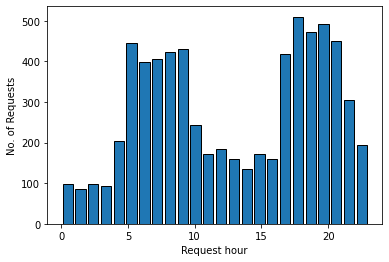

In [9]:
#Plot a graph for time of the request and number of request
plt.hist(df["Request hour"],edgecolor='black',bins=24,rwidth=0.8)
plt.xlabel("Request hour")
plt.ylabel("No. of Requests")
plt.show()

In [10]:
#Session details
#1) EARLY MORNING = Midnight to 5AM

#2) MORNING = 5AM to 10AM

#3) DAY TIME = 10AM to 5PM

#4) EVENING = 5PM to 10PM

#5) LATE NIGHT = 10PM TO Midnight

#Dividing the day into 5 categories

def time_period(x):
    if x<5:
        return"Early Morning"
    elif 5 <= x < 10:
        return "Morning"
    elif 10 <= x < 17:
        return "Day Time"
    elif 17 <= x < 22:
        return "Evening"
    else:
        return "Late Night"


In [11]:
#Creating a new column time slot for alloting the time
df['Time slot'] = df['Request hour'].apply(lambda x: time_period(x))
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request hour,Time slot
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,11,Day Time
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,17,Evening
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,9,Morning
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,21,Evening
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,Morning


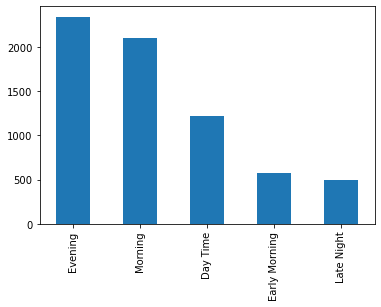

In [12]:
#Checking what time has more demand using bar plot
df['Time slot'].value_counts().plot.bar()
plt.show()

In [13]:
# As we can see in the  above plot evening time has more demand compared to the rest of the time

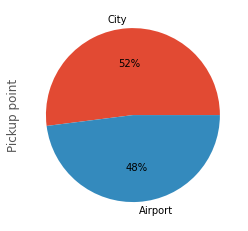

In [21]:
#Plotting a pie plot to check where the pick points are more
df["Pickup point"].value_counts().plot.pie(autopct='%2.0f%%')
plt.show()

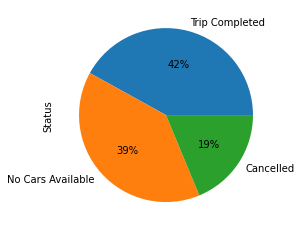

In [17]:
#Plotting a pie plot to find the percentage of the trips completed , trips cancelled and when no cars available
df["Status"].value_counts().plot.pie(autopct='%2.0f%%')
plt.show()

In [ ]:
#From the above plot we can see that approximately around 58% trips are either cancelled or due to unavailabilty of cars

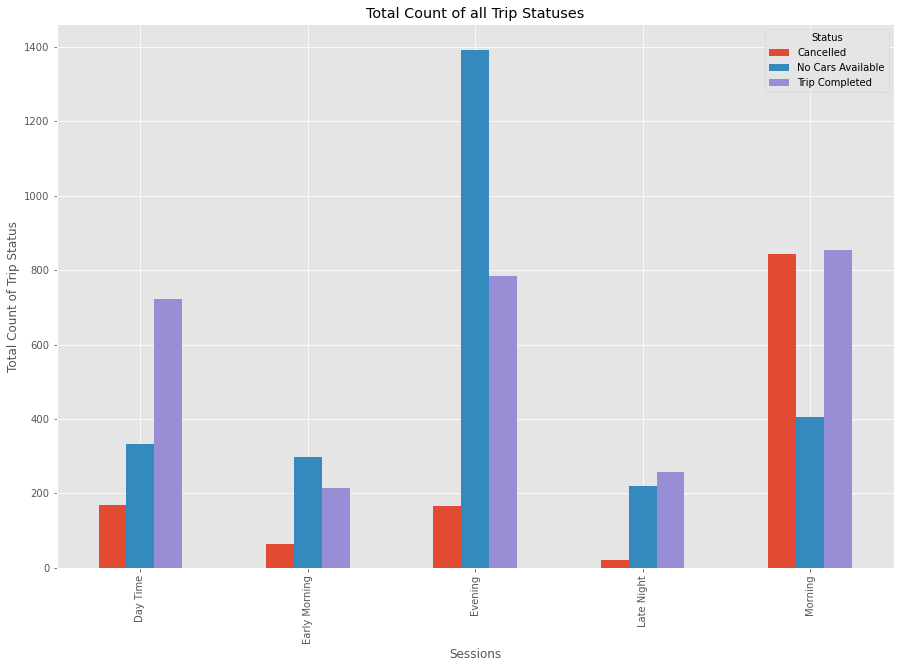

In [18]:
#Plotting the total count of all trip statuses
plt.style.use('ggplot')
df.groupby(['Time slot','Status']).Status.count().unstack().plot.bar(legend=True, figsize=(15,10))
plt.title('Total Count of all Trip Statuses')
plt.xlabel('Sessions')
plt.ylabel('Total Count of Trip Status')
plt.show()

In [ ]:
#Key observations
#1) Maximum number of cancellations are being done during morning hours from 5AM to 10AM by the drivers, this happens mainly due to less demand for the cabs from airport to city. This might be due to few number of flight arrivals at the airport in the morning. So drivers are not willing to take the trip as they will not have a booking to return back to the city, hence they cancel the trip.
#2) Customers find massive number of unavailable cars during evening hours from 5PM to 10PM, this could be due to huge number of flight arrivals and departures in the evening, that results in high demand for the cabs. Hence customers could not find a cab in the evening hours.